In [1]:
import balticEdited as bt
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import itertools
from collections import defaultdict
from matplotlib.patches import Patch
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
import matplotlib.ticker as ticker
import csv

In [2]:
list_of_genes = ["ha", "pb1", "pb2","pa","mp","np","na","ns"]

def load_tree(gene):
    path = f'./auspice/h3nx_{gene}.json'
    mytree, mymeta = bt.loadJSON(path)
    return(mytree)


Tree height: 113.520912
Tree length: 13052.481573
annotations present

Numbers of objects in tree: 11501 (5122 nodes and 6379 leaves)



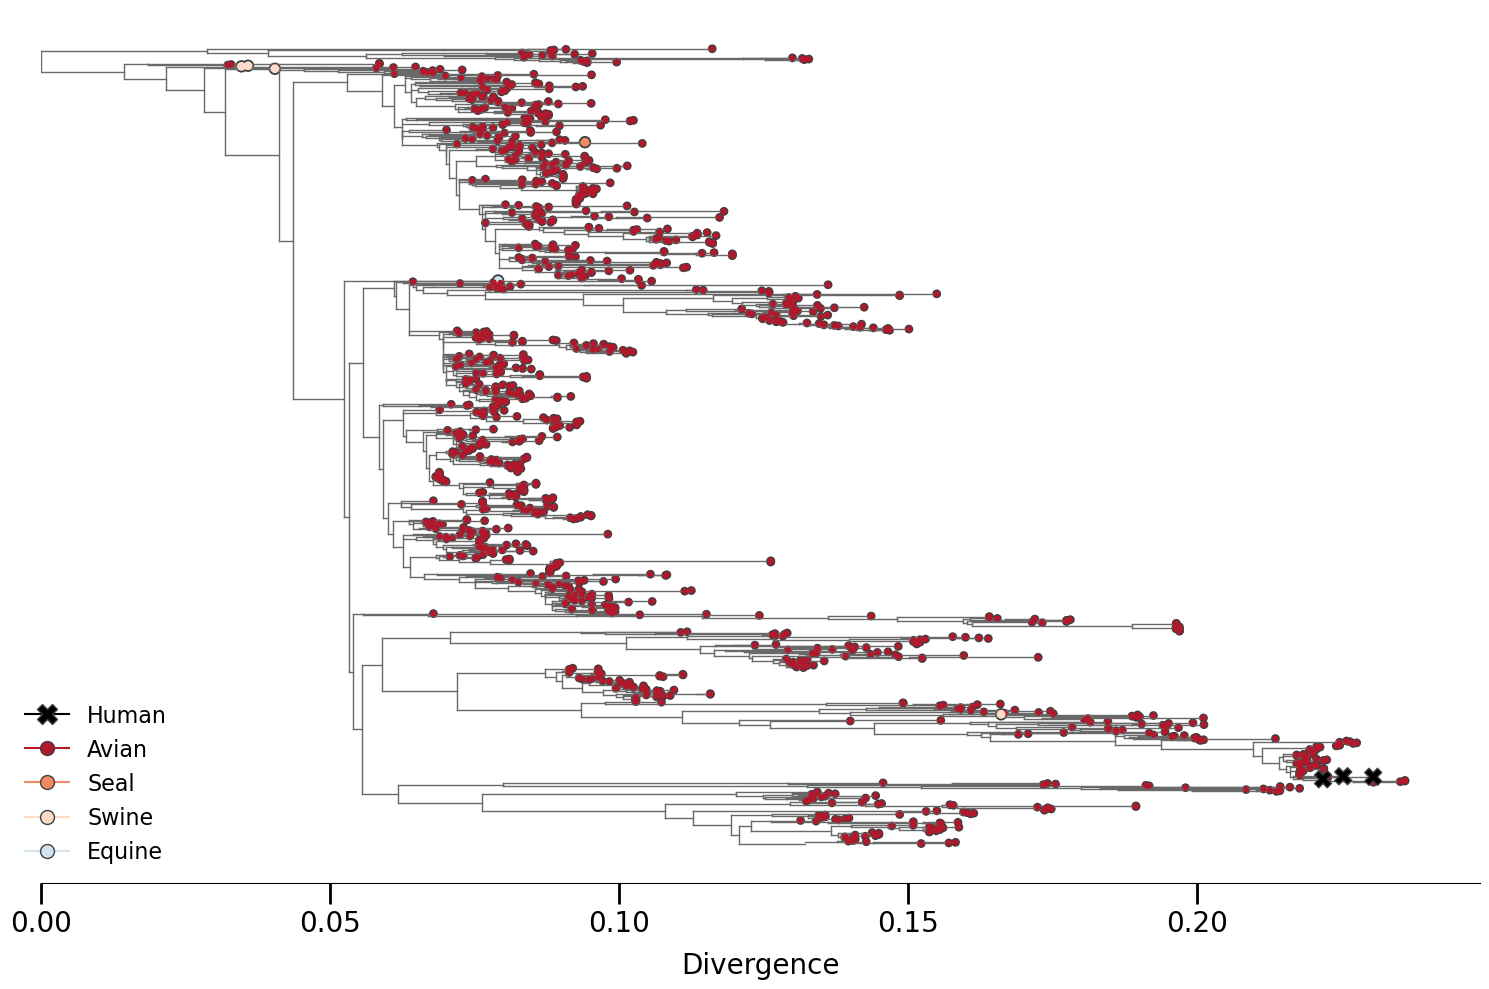

In [3]:
#NODE_0002018 is the mrca node for the eurasian avian clade

host_colors = {
    'Human': 'black',
    'Avian': '#b2182b',
    'Seal': '#ef8a62',
    'Swine': '#fddbc7',
    'Equine': '#d1e5f0',
}

human_strains = ["A/Henan/4-10/2022", "A/Guangdong/ZS-23SF005/2023", "A/Changsha/1000/2022"]


def s_func_x(k):
    mapping = {
        'Avian': 0,
        'Human': 150,
        'Swine': 0,
        'Seal': 0,
        'Equine': 0
    }
    return mapping[k.traits['host']]

def s_func_o1(k):
    mapping = {
        'Avian': 20,
        'Human': 0,
        'Swine': 40,
        'Seal': 40,
        'Equine': 40
    }
    return mapping[k.traits['host']]

mytree = load_tree("ha")

for k in mytree.Objects:
        
    if k.traits["name"] == "NODE_0002018":
        
        # dont want to include the canine h3n2 clade
        traverse_condition=lambda k:k.traits["host"]!="Canine"
        
        target_subtree = mytree.subtree(k,traverse_condition = traverse_condition)
        
        fig, ax = plt.subplots(figsize=(15, 10))
            
        root_div = target_subtree.root.traits['divergence']

        x_attr = lambda k: 0 if k == target_subtree.root else k.traits['divergence'] - root_div

        def subtree_coloring(k):
            host = k.traits["host"]
            return host_colors.get(host)  

        color_by = lambda k: subtree_coloring(k)
 
        target_subtree.plotTree(ax, x_attr=x_attr, colour='dimgrey', width = 1) 
        
        target_subtree.plotPoints(ax,
                   x_attr=x_attr,
                   size=s_func_o1,
                   colour=color_by,
                   outline_colour='#3f3f3f',
                   zorder=2,
                   marker='o')

        # plot tips with 'X' marker at zorder 3 using s_func_x
        target_subtree.plotPoints(ax,
                           x_attr=x_attr,
                           size=s_func_x,
                           colour=color_by,
                           outline=False,
                           zorder=3,
                           marker='X',
                           edgecolor='#3f3f3f')



        min_x_value = min(x_attr(k) for k in target_subtree.Objects)
        ax.set_xlim(left=max(0, min_x_value))

        han_list = []

        for key in host_colors:
            marker = mlines.Line2D(range(1),
                                   range(1),
                                   color = host_colors[key],
                                   marker = 'X' if key == 'Human' else 'o',
                                   markeredgecolor = '#3f3f3f',
                                   markerfacecolor = host_colors[key],
                                   label = key,
                                   markersize = 15 if key == 'Human' else 10
                                  )
            han_list.append(marker)

        ax.legend(handles = han_list,
                  markerfirst = True,
                  frameon = False,
                  loc = 3,
                  bbox_to_anchor = (-0.025, 0),
                  fontsize=16)
        
        ax.set_yticks([])

        ax.set_yticklabels([])

        [ax.spines[loc].set_visible(False) for loc in ax.spines if loc not in ['bottom']]
        ax.tick_params(axis='x',labelsize=20,size=15, width=2,color='black')
        ax.set_xlabel('Divergence', fontsize=20, labelpad=10, color='black')
        fig.tight_layout()
        # plt.savefig(f"./subsetted_eurasian_tree_ha_host_no_canine.pdf")
        plt.show()




Tree height: 113.520912
Tree length: 13052.481573
annotations present

Numbers of objects in tree: 11501 (5122 nodes and 6379 leaves)



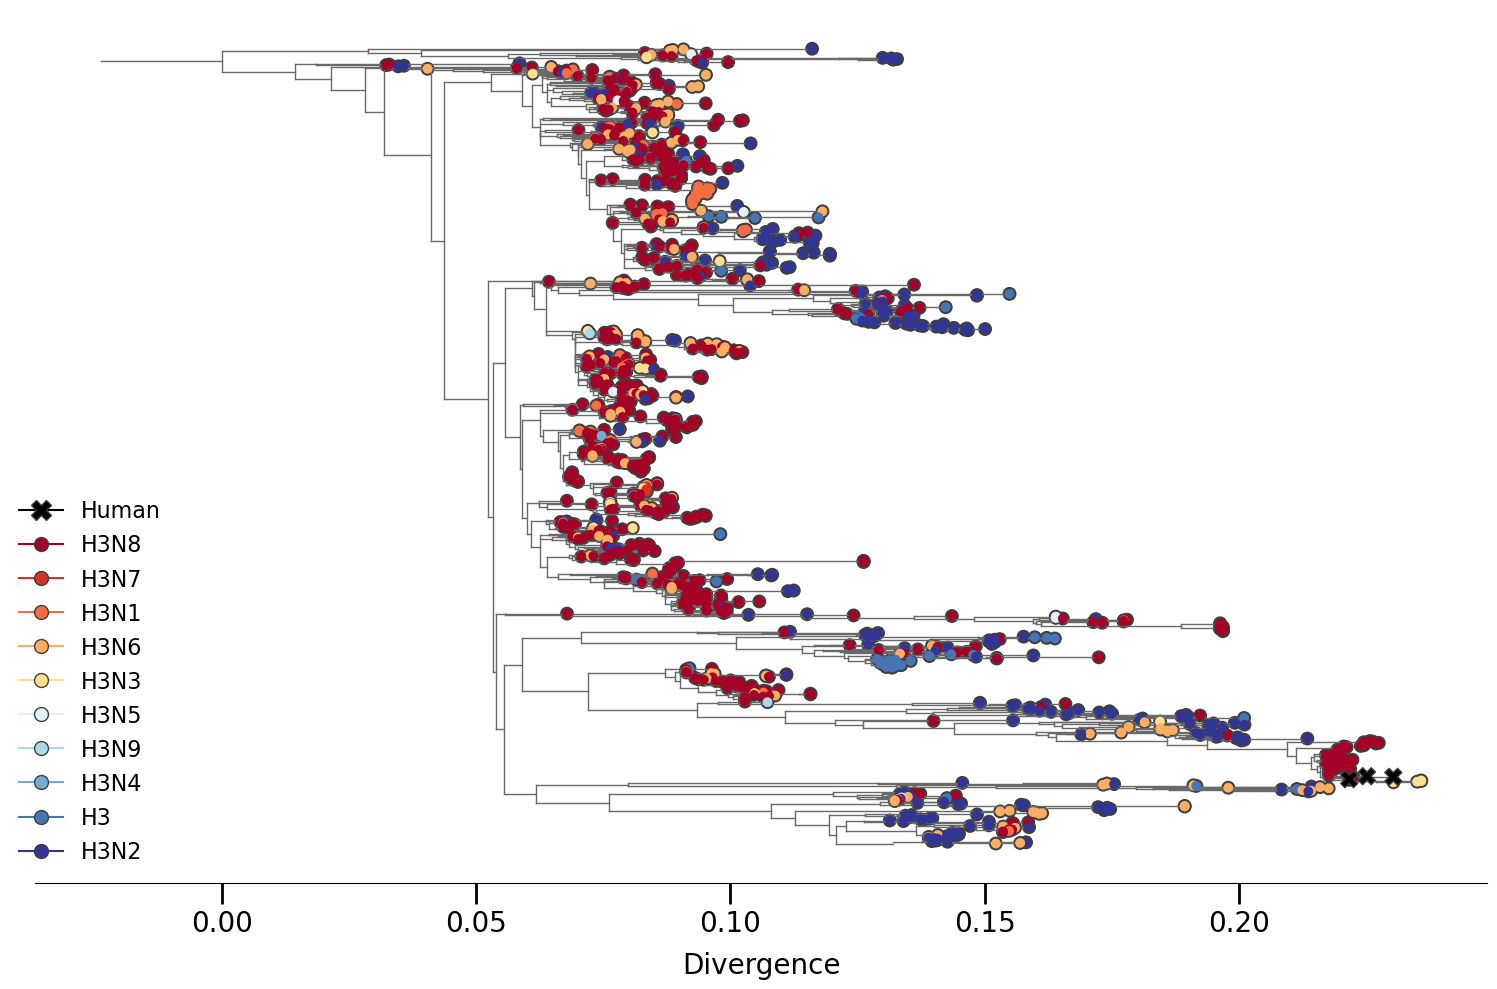

In [4]:
#subtype tree
#NODE_0002018

subtype_colors = {
    'Human': 'black',
    'H3N8': '#a50026',
    'H3N7': '#d73027',
    'H3N1' : '#f46d43',
    'H3N6' : '#fdae61',
    'H3N3': '#fee090',
    'H3N5': '#e0f3f8',
    'H3N9': '#abd9e9',
    'H3N4': '#74add1',
    'H3': '#4575b4',
    'H3N2': '#313695'
}

human_strains = ["A/Henan/4-10/2022", "A/Guangdong/ZS-23SF005/2023", "A/Changsha/1000/2022"]

def s_func_x(k):
    mapping = {
        'Avian': 0,
        'Equine': 0,
        'Human': 150,
        'Swine': 0,
        'Seal': 0,
        'Camel': 0,
        'Feline': 0
    }
    return mapping[k.traits['host']]

def s_func_o1(k):
    mapping = {
        'Avian': 50,
        'Equine': 50,
        'Human': 0,
        'Swine': 50,
        'Seal': 50,
        'Camel': 50,
        'Feline': 50
        
    }
    return mapping[k.traits['host']]



mytree = load_tree("ha")

for k in mytree.Objects:
        
    if k.traits["name"] == "NODE_0002018":
        
        traverse_condition=lambda k:k.traits["host"] != 'Canine'
        
        target_subtree = mytree.subtree(k, traverse_condition=traverse_condition)

        fig, ax = plt.subplots(figsize=(15, 10))
            
        root_div = target_subtree.root.traits['divergence']

        x_attr = lambda k: 0 if k == target_subtree.root else k.traits['divergence'] - root_div

        def subtree_coloring(k):
            subtype = k.traits["subtype"]
            return subtype_colors.get(subtype)  

        color_by = lambda k: "black" if k.traits['host'] == "Human" else subtree_coloring(k)

        target_subtree.plotTree(ax, x_attr=x_attr, colour='dimgrey', width = 1) 
        
        #avian
        target_subtree.plotPoints(ax,
                   x_attr=x_attr,
                   size=s_func_o1,
                   colour=color_by,
                   outline_colour='#3f3f3f',
                   zorder=2,
                   marker='o')
        
        # human
        target_subtree.plotPoints(ax,
                           x_attr=x_attr,
                           size=s_func_x,
                           colour=color_by,
                           outline=False,
                           zorder=4,
                           marker='X',
                           edgecolor='#3f3f3f')

        han_list = []

        for key in subtype_colors:
            marker = mlines.Line2D(range(1),
                                   range(1),
                                   color = subtype_colors[key],
                                   marker = 'X' if key == 'Human' else 'o',
                                   markeredgecolor = '#3f3f3f',
                                   markerfacecolor = subtype_colors[key],
                                   label = key,
                                   markersize = 15 if key == 'Human' else 10
                                  )
            han_list.append(marker)

        ax.legend(handles = han_list,
                  markerfirst = True,
                  frameon = False,
                  loc = 3,
                  bbox_to_anchor = (-0.025, 0),
                  fontsize=16)
        
        ax.set_yticks([])

        ax.set_yticklabels([])

        [ax.spines[loc].set_visible(False) for loc in ax.spines if loc not in ['bottom']]
        ax.tick_params(axis='x',labelsize=20,size=15, width=2,color='black')
        ax.set_xlabel('Divergence', fontsize=20, labelpad=10, color='black')
        fig.tight_layout()
        plt.savefig(f"./subsetted_eurasian_tree_ha_subtype.pdf")
        plt.show()




Tree height: 113.520912
Tree length: 13052.481573
annotations present

Numbers of objects in tree: 11501 (5122 nodes and 6379 leaves)



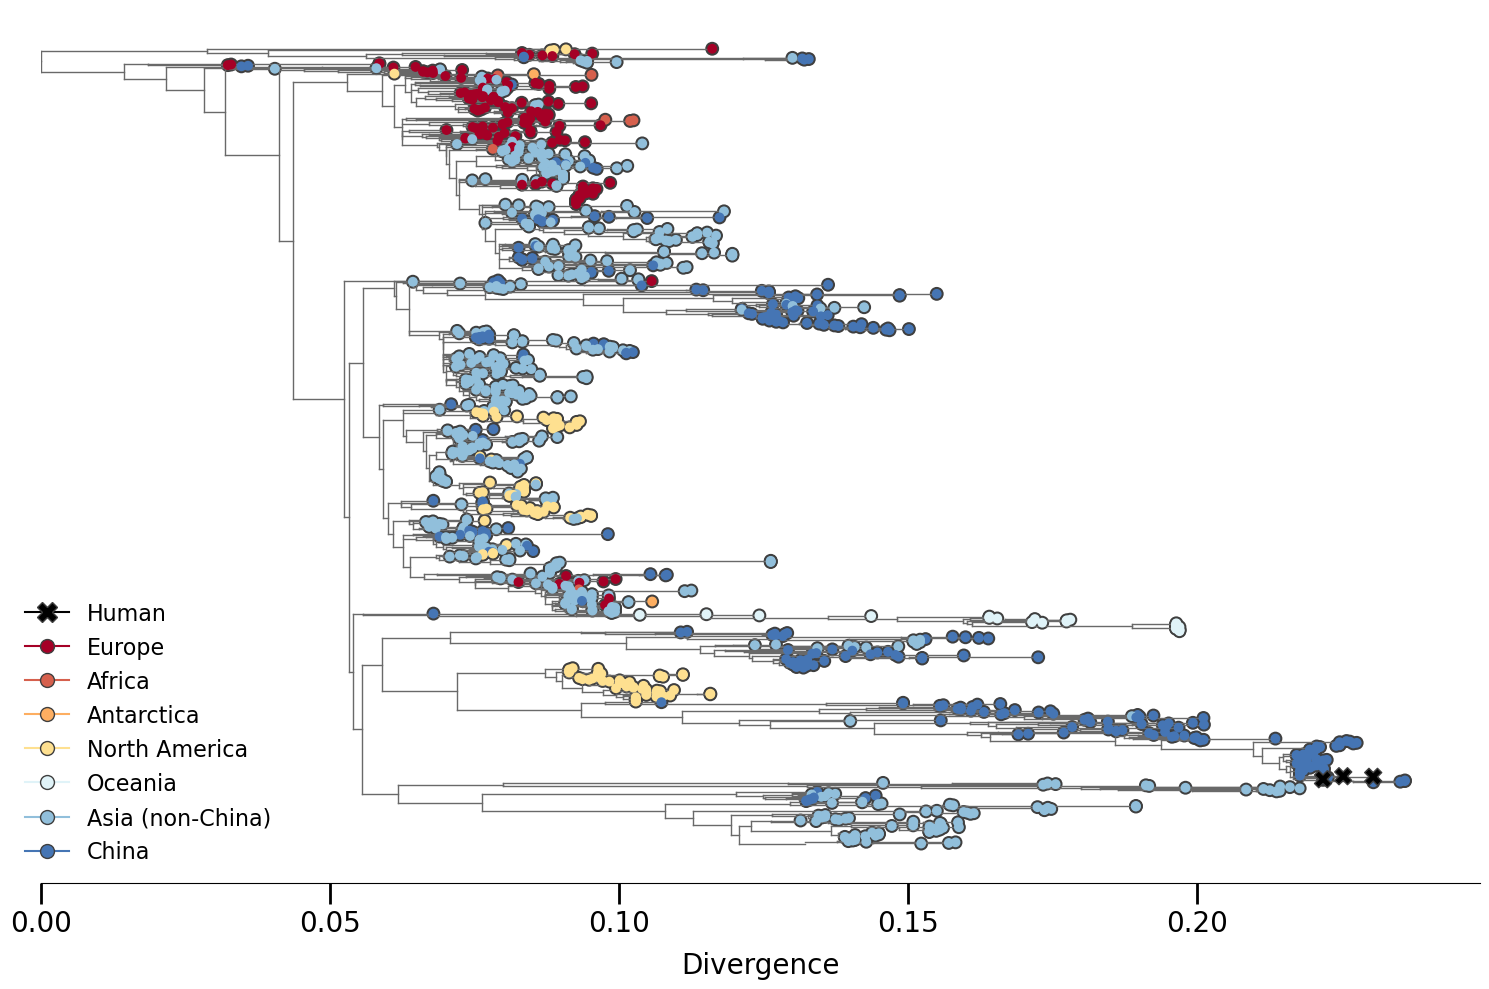

In [5]:
#region tree, without canine
#NODE_0002018

region_colors = {
    'Human': 'black',
    'Europe': '#a50026',
    'Africa': '#d6604d',
    'Antarctica': '#fdae61',
    'North America': '#fee090',
    'Oceania': '#e0f3f8',
    'Asia (non-China)' : '#91bfdb',
    'China': '#4575b4'
}

asia = ['Japan Korea', 'West Asia', 'Southeast Asia', 'South Asia']
   
human_strains = ["A/Henan/4-10/2022", "A/Guangdong/ZS-23SF005/2023", "A/Changsha/1000/2022"]

def s_func_x(k):
    mapping = {
        'Avian': 0,
        'Equine': 0,
        'Human': 150,
        'Swine': 0,
        'Seal': 0,
        'Camel': 0,
        'Feline': 0
    }
    return mapping[k.traits['host']]

def s_func_o1(k):
    mapping = {
        'Avian': 50,
        'Equine': 50,
        'Human': 0,
        'Swine': 50,
        'Seal': 50,
        'Camel': 50,
        'Feline': 50
        
    }
    return mapping[k.traits['host']]

mytree = load_tree("ha")

for k in mytree.Objects:
        
    if k.traits["name"] == "NODE_0002018":
        
        traverse_condition=lambda k:k.traits["host"]!="Canine"
        
        target_subtree = mytree.subtree(k, traverse_condition=traverse_condition)
        
        fig, ax = plt.subplots(figsize=(15, 10))
            
        root_div = target_subtree.root.traits['divergence']

        x_attr = lambda k: 0 if k == target_subtree.root else k.traits['divergence'] - root_div

        def subtree_coloring(k):
            region = k.traits["region"]
            return region_colors.get(region)  

        color_by = lambda k: (
            "black" if k.traits['host'] == "Human" 
            else '#91bfdb' if k.traits['region'] in asia 
            else subtree_coloring(k)
        )
        
        target_subtree.plotTree(ax, x_attr=x_attr, colour='dimgrey', width=1) 
        
        target_subtree.plotPoints(ax,
                   x_attr=x_attr,
                   size=s_func_o1,
                   colour=color_by,
                   outline_colour='#3f3f3f',
                   zorder=2,
                   marker='o')

        # plot tips with 'X' marker at zorder 3 using s_func_x
        target_subtree.plotPoints(ax,
                           x_attr=x_attr,
                           size=s_func_x,
                           colour=color_by,
                           outline=False,
                           zorder=3,
                           marker='X',
                           edgecolor='#3f3f3f')
        


        min_x_value = min(x_attr(k) for k in target_subtree.Objects)
        ax.set_xlim(left=max(0, min_x_value))
        
        han_list = []

        for key in region_colors:
            marker = mlines.Line2D(range(1),
                                   range(1),
                                   color = region_colors[key],
                                   marker = 'X' if key == 'Human' else 'o',
                                   markeredgecolor = '#3f3f3f',
                                   markerfacecolor = region_colors[key],
                                   label = key,
                                   markersize = 15 if key == 'Human' else 10
                                  )
            han_list.append(marker)

        ax.legend(handles = han_list,
                  markerfirst = True,
                  frameon = False,
                  loc = 3,
                  bbox_to_anchor = (-0.025, 0),
                  fontsize=16)
        
        ax.set_yticks([])

        ax.set_yticklabels([])

        [ax.spines[loc].set_visible(False) for loc in ax.spines if loc not in ['bottom']]
        ax.tick_params(axis='x',labelsize=20,size=15, width=2,color='black')
        ax.set_xlabel('Divergence', fontsize=20, labelpad=10, color='black')
        fig.tight_layout()
        # plt.savefig(f"./subsetted_eurasian_tree_ha_region.pdf")
        plt.show()



In [7]:
subsetted_nodes = {
    'ns' : 'NODE_0001868',
    'ha' : 'NODE_0003204',
    'mp' : 'NODE_0003623',
    'na' : 'NODE_0000327',
    'np' : 'NODE_0002733',
    'pa' : 'NODE_0002719',
    'pb2' : 'NODE_0003730', 
    'pb1' : 'NODE_0002265'
}


Tree height: 113.520912
Tree length: 13052.481573
annotations present

Numbers of objects in tree: 11501 (5122 nodes and 6379 leaves)

ha


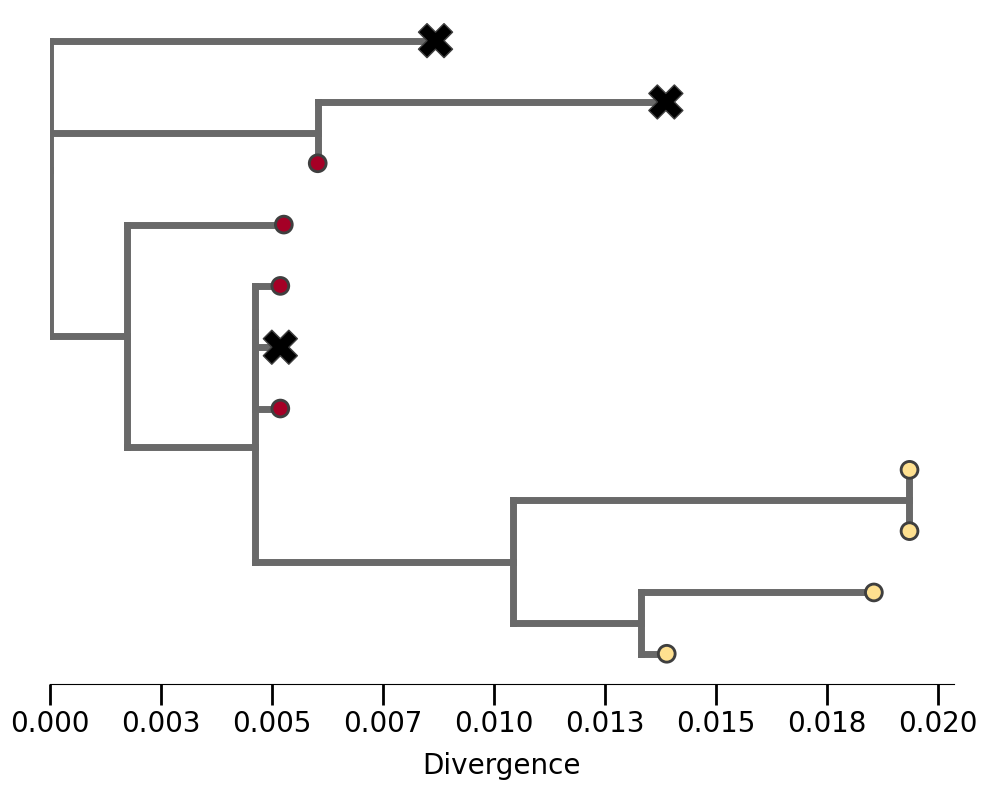


Tree height: 77.594716
Tree length: 13000.133307
annotations present

Numbers of objects in tree: 9533 (4254 nodes and 5279 leaves)

pb1


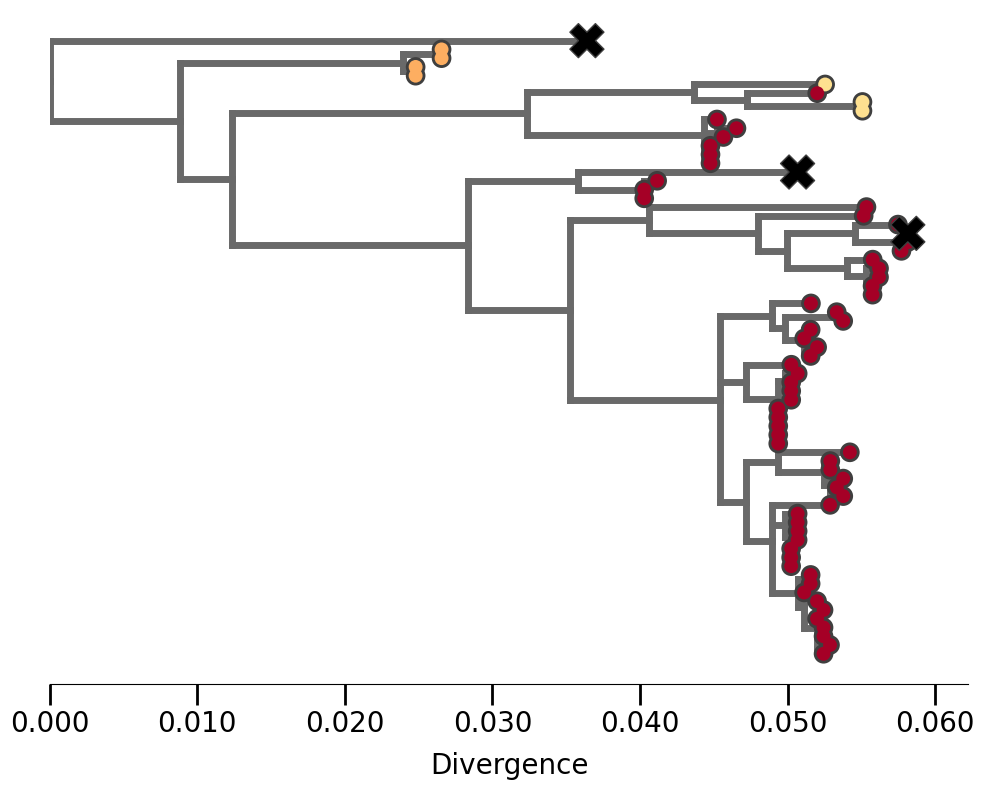


Tree height: 116.854145
Tree length: 13914.610070
annotations present

Numbers of objects in tree: 9604 (4281 nodes and 5323 leaves)

pb2


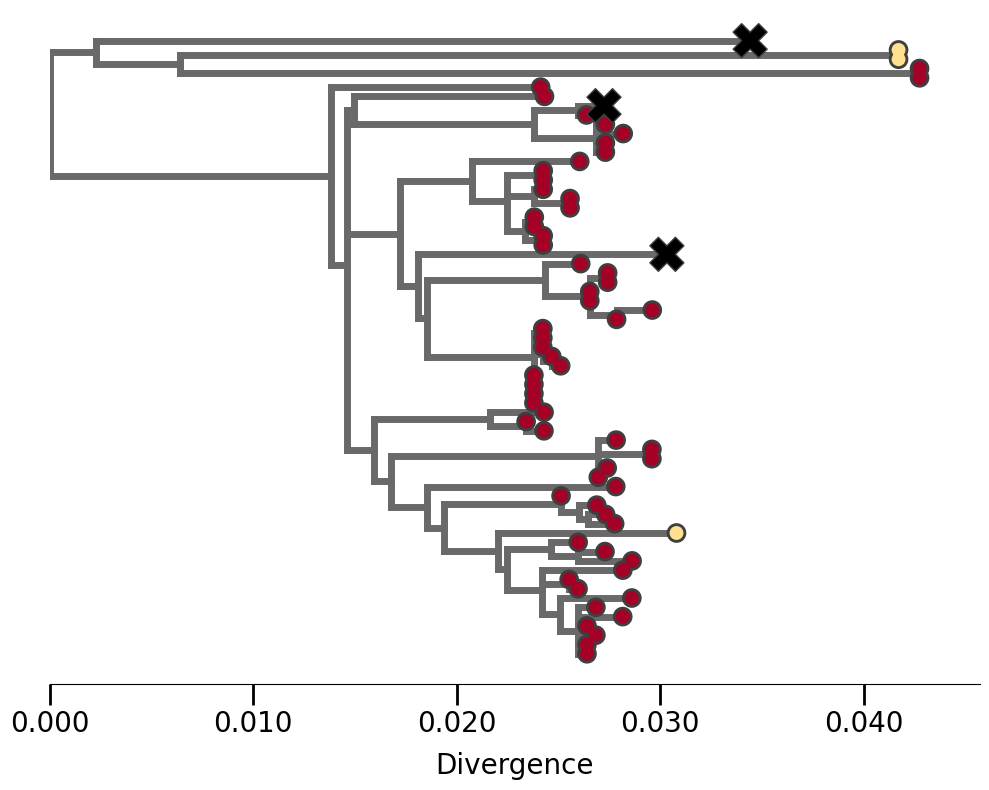


Tree height: 116.522750
Tree length: 14449.613505
annotations present

Numbers of objects in tree: 9698 (4354 nodes and 5344 leaves)

pa


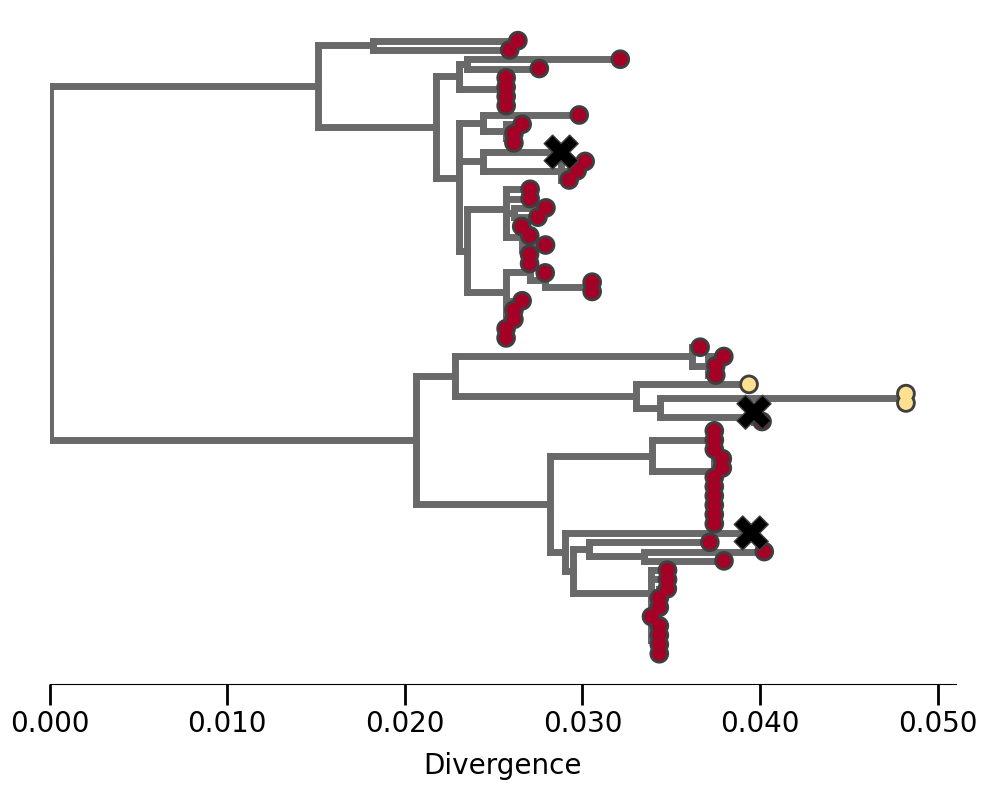


Tree height: 100.552478
Tree length: 18429.161304
annotations present

Numbers of objects in tree: 9872 (4257 nodes and 5615 leaves)

mp


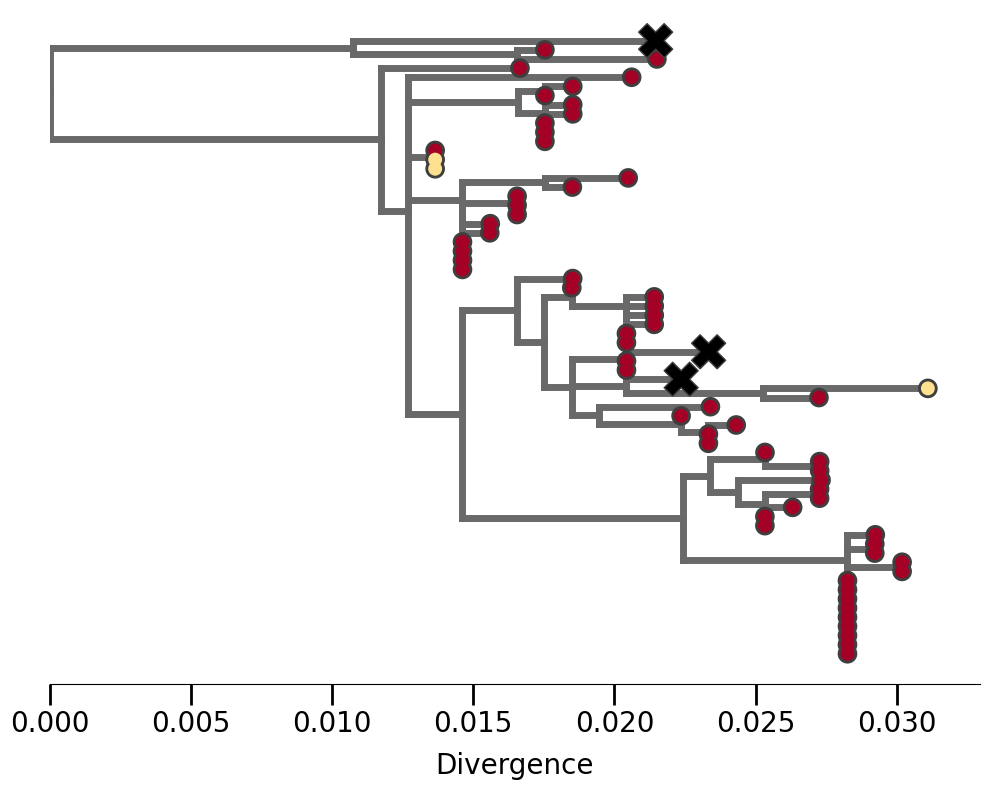


Tree height: 134.113515
Tree length: 16090.541848
annotations present

Numbers of objects in tree: 9770 (4277 nodes and 5493 leaves)

np


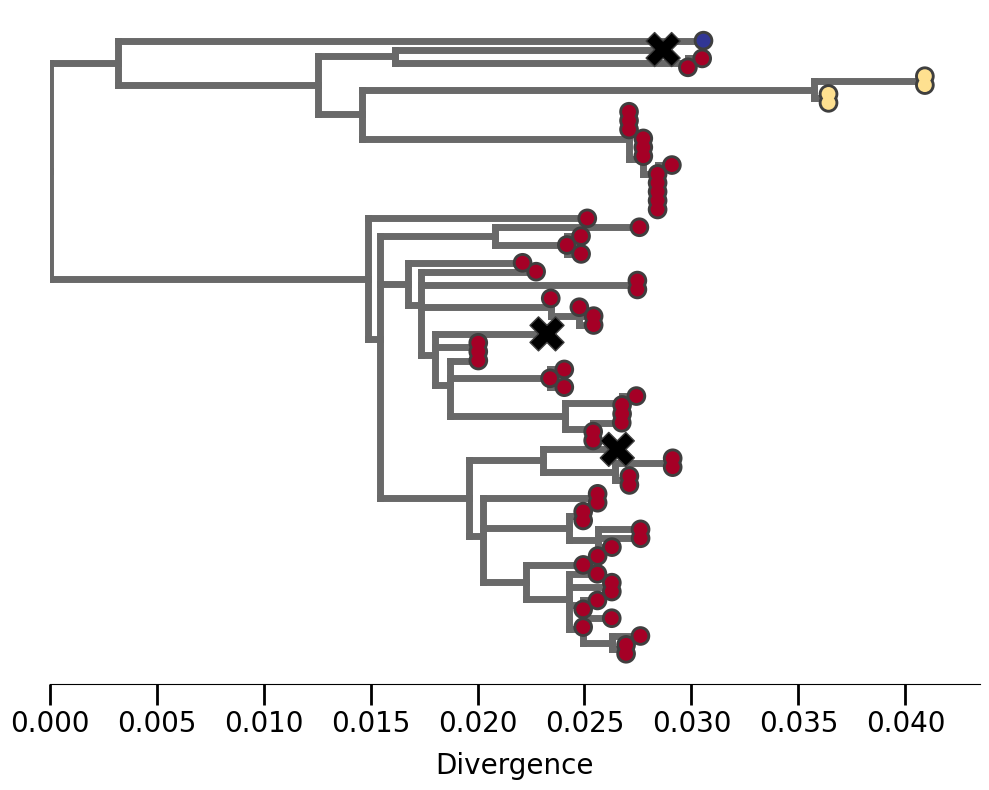


Tree height: 367.341941
Tree length: 19038.300397
annotations present

Numbers of objects in tree: 10818 (4794 nodes and 6024 leaves)

na


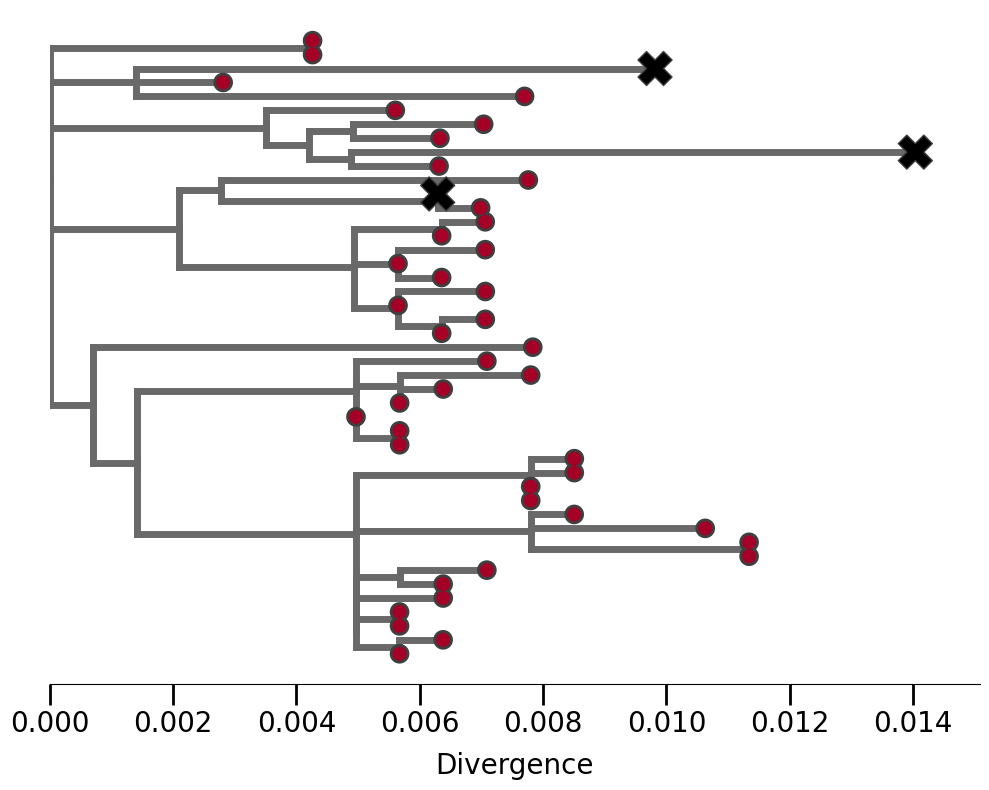


Tree height: 228.251862
Tree length: 33514.416505
annotations present

Numbers of objects in tree: 9975 (4421 nodes and 5554 leaves)

ns


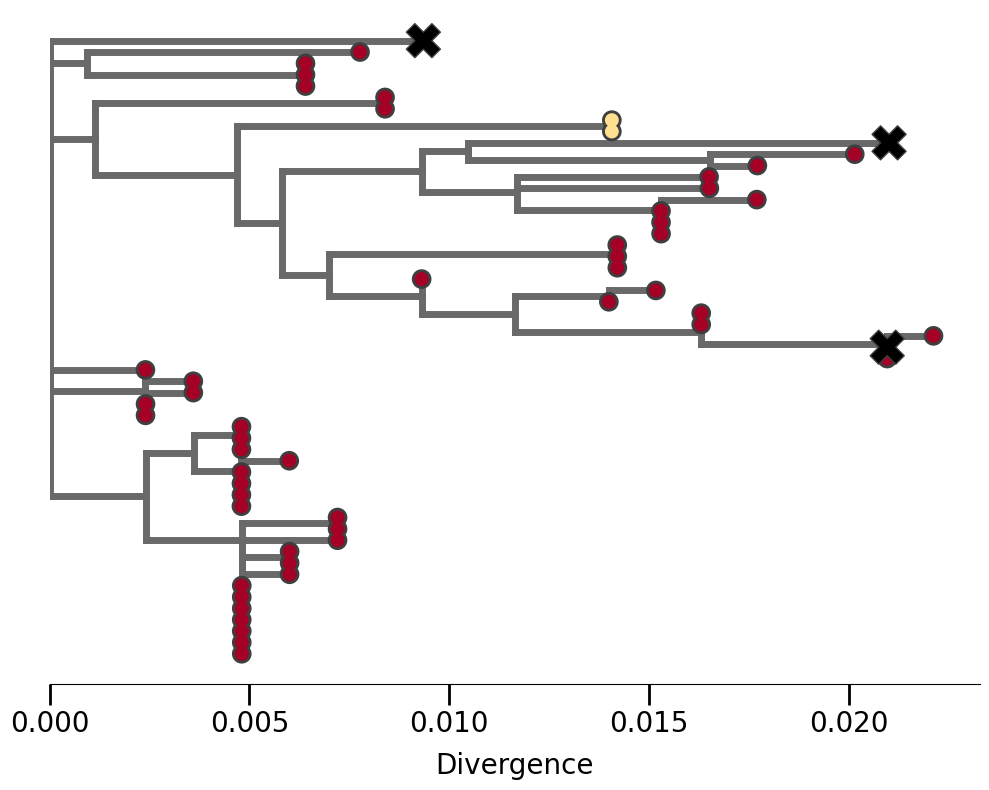

In [8]:
list_of_genes = ["ha", "pb1", "pb2","pa","mp","np","na","ns"]

host_colors = {
    'H3N8': '#a50026',
    'H3N7': '#d73027',
    'H3N1' : '#f46d43',
    'H3N6' : '#fdae61',
    'H3N3': '#fee090',
    'H3N5': '#e0f3f8',
    'H3N9': '#abd9e9',
    'H3N4': '#74add1',
    'H3': '#4575b4',
    'H3N2': '#313695'
}

human_strains = ["A/Henan/4-10/2022", "A/Guangdong/ZS-23SF005/2023", "A/Changsha/1000/2022"]

def s_func_x(k):
    mapping = {
        'Avian': 0,
        'Human': 600
    }
    return mapping[k.traits['host']]

def s_func_o1(k):
    mapping = {
        'Avian': 100,
        'Human': 0
    }
    return mapping[k.traits['host']]


for gene in list_of_genes:
    
    mytree = load_tree(f"{gene}")
    
    for k in mytree.Objects:
        
        if k.traits["name"] == subsetted_nodes[gene]:
            
            target_subtree = mytree.subtree(k)
            
            fig, ax = plt.subplots(figsize=(10, 8))
            
            root_div = target_subtree.root.traits['divergence']
        
            x_attr = lambda k: 0 if k == target_subtree.root else k.traits['divergence'] - root_div
            
            def subtree_coloring(k):
                subtype = k.traits["subtype"]
                return host_colors.get(subtype)  

            color_by = lambda k: "black" if k.traits['host'] == "Human" else subtree_coloring(k)

            target_subtree.plotTree(ax, x_attr=x_attr, colour='dimgrey', width =5)  
        
            target_subtree.plotPoints(ax,
                       x_attr=x_attr,
                       size=s_func_o1,
                       colour=color_by,
                       outline_colour='#3f3f3f',
                       zorder=3,
                       marker='o')

            # plot tips with 'X' marker at zorder 3 using s_func_x
            target_subtree.plotPoints(ax,
                               x_attr=x_attr,
                               size=s_func_x,
                               colour=color_by,
                               outline=False,
                               zorder=4,
                               marker='X',
                               edgecolor='#3f3f3f')

            target_func = lambda k: k.traits['name'] in human_strains
            text_func = lambda k: k.traits['name'] 
            
            # text_x_attr=lambda k: (0 if k == target_subtree.root else k.traits['divergence'] - root_div) + 0.001

            # target_subtree.addText(ax, x_attr=text_x_attr, target=target_func, text=text_func, size = '15')
            
            min_x_value = min(x_attr(k) for k in target_subtree.Objects)
            ax.set_xlim(left=max(0, min_x_value))
        
        

            ax.set_yticks([])

            ax.set_yticklabels([])
            

            [ax.spines[loc].set_visible(False) for loc in ax.spines if loc not in ['bottom']]
            ax.tick_params(axis='x',labelsize=20,size=15, width=2,color='black')
            ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
            ax.set_xlabel('Divergence', fontsize=20, labelpad=10, color='black')
            print(gene)
            fig.tight_layout()
            plt.savefig(f"./subsetted_tree_by-subtype_{gene}.pdf")
            plt.show()
            
            

In [9]:
#making a table that traverses from the MRCA to each human H3 tip by gene segment
#collects all mutations that occur on each path
#next block of code creates a table that only keeps the differences between the 3 human isolates

import baltic as bt

def load_tree(gene):
    path = f'./auspice/h3nx_{gene}.json'
    mytree, mymeta = bt.loadJSON(path)
    return(mytree)

human_strains = ["A/Henan/4-10/2022", "A/Guangdong/ZS-23SF005/2023", "A/Changsha/1000/2022"]

#TMRCA for the 3 human strains

strain_mutations = {strain: {} for strain in human_strains}

list_of_genes = ["ha", "pb1", "pb2","pa","mp","np","na","ns"]

for gene in list_of_genes:
    
    print(gene)
    
    mytree = load_tree(f"{gene}")
    
    tmrca_node = next(k for k in mytree.Objects if k.traits["name"] == subsetted_nodes[gene])
    print("tmrca_node:" + tmrca_node.traits['name'])
    target_subtree = mytree.subtree(tmrca_node)
    
    for strain_name in human_strains:

        strain_node = next(k for k in target_subtree.Objects if k.traits["name"] == strain_name)
        print("strain_node:" + strain_node.traits['name'],strain_node.parent.traits['name'] )
        current_node = strain_node
        
        aa_mutations = []
        
        # traverse back to the TMRCA, collecting mutations along the way
        while current_node.traits['name'] != tmrca_node.traits['name']:
            
            # print("current node:" + current_node.traits['name'])

            if gene == "mp":
                aa_mutations = []
                for sub_gene in ["M1", "M2"]:
                    # print(mut for mut in current_node.traits["branch_attrs"]["mutations"])
                    aa_mutations.extend([
                        mut for mut in current_node.traits["branch_attrs"]["mutations"].get(sub_gene, [])
                        if "-" not in mut and "X" not in mut and "*" not in mut
                    ])
                strain_mutations[strain_name].setdefault(gene, []).extend(aa_mutations)

            elif gene == "ns":
                aa_mutations = []
                for sub_gene in ["NEP", "NS1"]:
                    aa_mutations.extend([
                        mut for mut in current_node.traits["branch_attrs"]["mutations"].get(sub_gene, [])
                        if "-" not in mut and "X" not in mut and "*" not in mut
                    ])
                strain_mutations[strain_name].setdefault(gene, []).extend(aa_mutations)

            elif gene == "pa":
                aa_mutations = []
                for sub_gene in ["PA", "PA-X"]:
                    aa_mutations.extend([
                        mut for mut in current_node.traits["branch_attrs"]["mutations"].get(sub_gene, [])
                        if "-" not in mut and "X" not in mut and "*" not in mut
                    ])
                strain_mutations[strain_name].setdefault(gene, []).extend(aa_mutations)

            elif gene == "pb1":
                aa_mutations = []
                for sub_gene in ["PB1", "PB1-F2"]:
                    aa_mutations.extend([
                        mut for mut in current_node.traits["branch_attrs"]["mutations"].get(sub_gene, [])
                        if "-" not in mut and "X" not in mut and "*" not in mut
                    ])
                strain_mutations[strain_name].setdefault(gene, []).extend(aa_mutations)

            else:
                aa_mutations = [
                    mut for mut in current_node.traits["branch_attrs"]["mutations"].get(f"{gene.upper()}", [])
                    if "-" not in mut and "X" not in mut and "*" not in mut
                ]

                strain_mutations[strain_name].setdefault(gene, []).extend(aa_mutations)
                
            current_node = current_node.parent
            
            


ha

Tree height: 113.520912
Tree length: 13052.481573
annotations present

Numbers of objects in tree: 11501 (5122 nodes and 6379 leaves)

tmrca_node:NODE_0003204
strain_node:A/Henan/4-10/2022 NODE_0003655
strain_node:A/Guangdong/ZS-23SF005/2023 NODE_0003206
strain_node:A/Changsha/1000/2022 NODE_0003204
pb1

Tree height: 77.594716
Tree length: 13000.133307
annotations present

Numbers of objects in tree: 9533 (4254 nodes and 5279 leaves)

tmrca_node:NODE_0002265
strain_node:A/Henan/4-10/2022 NODE_0002289
strain_node:A/Guangdong/ZS-23SF005/2023 NODE_0002281
strain_node:A/Changsha/1000/2022 NODE_0002265
pb2

Tree height: 116.854145
Tree length: 13914.610070
annotations present

Numbers of objects in tree: 9604 (4281 nodes and 5323 leaves)

tmrca_node:NODE_0003730
strain_node:A/Henan/4-10/2022 NODE_0003739
strain_node:A/Guangdong/ZS-23SF005/2023 NODE_0003780
strain_node:A/Changsha/1000/2022 NODE_0003731
pa

Tree height: 116.522750
Tree length: 14449.613505
annotations present

Numbers of 

In [10]:
print(json.dumps(strain_mutations, indent=4))

{
    "A/Henan/4-10/2022": {
        "ha": [
            "L400V",
            "F541L"
        ],
        "pb1": [
            "D172N",
            "A374E",
            "E738K",
            "M1T",
            "I339V",
            "V525I",
            "C42Y",
            "Q3R",
            "P33L",
            "Q37P",
            "N375S",
            "S384A",
            "S77L",
            "I525V",
            "G23D",
            "Q26R"
        ],
        "pb2": [
            "D153V",
            "E627K",
            "R299K",
            "Y118F",
            "R355K",
            "C409S",
            "M676V",
            "K702R"
        ],
        "pa": [
            "A343S"
        ],
        "mp": [
            "G89S",
            "L46I",
            "P10L",
            "R12K",
            "I42M"
        ],
        "np": [],
        "na": [
            "P37L",
            "N42S",
            "N46K",
            "L17S",
            "V27A"
        ],
        "ns": [
            "S60R",
  

In [11]:
# dictionary gets converted to df which gets converted to an excel table
# final formatting of the table was done in excel

row_and_column = list(strain_mutations.keys())

df = pd.DataFrame([], index=row_and_column, columns=row_and_column).fillna('')
# print(df)

for col in df.columns:
    for index, _ in df.iterrows():
        
        if col == index:
            continue
        
        index_dict = strain_mutations[index]
        column_dict = strain_mutations[col]
        
        for gene in index_dict.keys():
            df.loc[index, col] += f"{gene.upper()}:" + ", ".join(list(set(index_dict[gene]).difference(set(column_dict[gene])))) + "\n"

print(df)
# df.to_csv('./my_dataframe.csv')

                                                             A/Henan/4-10/2022  \
A/Henan/4-10/2022                                                                
A/Guangdong/ZS-23SF005/2023  HA:I506V, E360A, K557E, K466R, N204T, I50V, R2...   
A/Changsha/1000/2022         HA:I41V, I294V, R285K, D505N\nPB1:Q5R, M171I, ...   

                                                   A/Guangdong/ZS-23SF005/2023  \
A/Henan/4-10/2022            HA:F541L, L400V\nPB1:P33L, M1T, I339V, V525I, ...   
A/Guangdong/ZS-23SF005/2023                                                      
A/Changsha/1000/2022         HA:I41V, I294V, D505N\nPB1:Q5R, M171I, K21M, N...   

                                                          A/Changsha/1000/2022  
A/Henan/4-10/2022            HA:F541L, L400V\nPB1:N375S, I525V, P33L, M1T, ...  
A/Guangdong/ZS-23SF005/2023  HA:I506V, E360A, K557E, K466R, N204T, I50V, K2...  
A/Changsha/1000/2022                                                            
